In [67]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import sklearn.metrics
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime

In [6]:
iris = load_iris()
X = iris.data[:,(2,3)] # petal length and width
y = (iris.target == 0).astype(np.int)

In [20]:
per = Perceptron(random_state=42, max_iter=1000, tol=1e-3)
cross_val_score(per, X, y, scoring='roc_auc', cv=10)
#per.fit(X, y)
#sklearn.metrics.roc_auc_score(y, per.predict(X))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

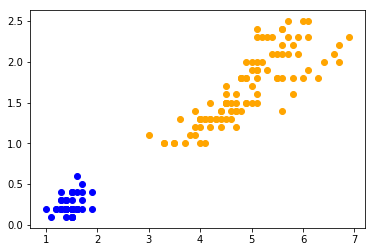

In [33]:
plt.scatter(X[y==1,0],X[y==1,1], color='blue')
plt.scatter(X[y==0,0],X[y==0,1], color='orange')

In [34]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"].astype(np.int), test_size=0.33, random_state=42, shuffle=True)

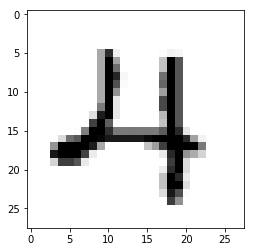

In [63]:
plt.imshow(X_train[302].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

In [81]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_columns)
start = datetime.utcnow()
dnn.fit(x=X_train, y=y_train, batch_size=50, steps=40000)
print("Elapsed time: {}".format(datetime.utcnow() - start))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f39e1a8da58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpn9q_s5hm'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpn9q_s5hm/mo

INFO:tensorflow:loss = 0.21276946, step = 7201 (0.407 sec)
INFO:tensorflow:global_step/sec: 245.31
INFO:tensorflow:loss = 0.13401964, step = 7301 (0.408 sec)
INFO:tensorflow:global_step/sec: 249.408
INFO:tensorflow:loss = 0.27759826, step = 7401 (0.401 sec)
INFO:tensorflow:global_step/sec: 252.592
INFO:tensorflow:loss = 0.43902358, step = 7501 (0.396 sec)
INFO:tensorflow:global_step/sec: 244.393
INFO:tensorflow:loss = 0.14376137, step = 7601 (0.410 sec)
INFO:tensorflow:global_step/sec: 246.96
INFO:tensorflow:loss = 0.21743993, step = 7701 (0.405 sec)
INFO:tensorflow:global_step/sec: 249.385
INFO:tensorflow:loss = 0.15325385, step = 7801 (0.401 sec)
INFO:tensorflow:global_step/sec: 248.928
INFO:tensorflow:loss = 0.4182479, step = 7901 (0.401 sec)
INFO:tensorflow:global_step/sec: 252.458
INFO:tensorflow:loss = 0.14643358, step = 8001 (0.396 sec)
INFO:tensorflow:global_step/sec: 250.581
INFO:tensorflow:loss = 0.33495477, step = 8101 (0.399 sec)
INFO:tensorflow:global_step/sec: 245.089
INF

INFO:tensorflow:global_step/sec: 251.304
INFO:tensorflow:loss = 0.073881224, step = 15401 (0.399 sec)
INFO:tensorflow:global_step/sec: 248.035
INFO:tensorflow:loss = 0.14037396, step = 15501 (0.403 sec)
INFO:tensorflow:global_step/sec: 242.849
INFO:tensorflow:loss = 0.25687018, step = 15601 (0.412 sec)
INFO:tensorflow:global_step/sec: 243.122
INFO:tensorflow:loss = 0.08179175, step = 15701 (0.411 sec)
INFO:tensorflow:global_step/sec: 247.752
INFO:tensorflow:loss = 0.1579136, step = 15801 (0.403 sec)
INFO:tensorflow:global_step/sec: 250.852
INFO:tensorflow:loss = 0.059206728, step = 15901 (0.399 sec)
INFO:tensorflow:global_step/sec: 246.89
INFO:tensorflow:loss = 0.06534516, step = 16001 (0.405 sec)
INFO:tensorflow:global_step/sec: 245.917
INFO:tensorflow:loss = 0.07518601, step = 16101 (0.408 sec)
INFO:tensorflow:global_step/sec: 248.411
INFO:tensorflow:loss = 0.060157266, step = 16201 (0.401 sec)
INFO:tensorflow:global_step/sec: 251.596
INFO:tensorflow:loss = 0.25989732, step = 16301 (

INFO:tensorflow:loss = 0.060997296, step = 23501 (0.413 sec)
INFO:tensorflow:global_step/sec: 247.965
INFO:tensorflow:loss = 0.0739745, step = 23601 (0.405 sec)
INFO:tensorflow:global_step/sec: 249.295
INFO:tensorflow:loss = 0.1207745, step = 23701 (0.399 sec)
INFO:tensorflow:global_step/sec: 251.316
INFO:tensorflow:loss = 0.21233372, step = 23801 (0.398 sec)
INFO:tensorflow:global_step/sec: 253.235
INFO:tensorflow:loss = 0.09092974, step = 23901 (0.395 sec)
INFO:tensorflow:global_step/sec: 251.855
INFO:tensorflow:loss = 0.06247524, step = 24001 (0.397 sec)
INFO:tensorflow:global_step/sec: 244.869
INFO:tensorflow:loss = 0.0074857906, step = 24101 (0.408 sec)
INFO:tensorflow:global_step/sec: 246.366
INFO:tensorflow:loss = 0.1147509, step = 24201 (0.409 sec)
INFO:tensorflow:global_step/sec: 249.06
INFO:tensorflow:loss = 0.04575092, step = 24301 (0.398 sec)
INFO:tensorflow:global_step/sec: 250.778
INFO:tensorflow:loss = 0.144822, step = 24401 (0.399 sec)
INFO:tensorflow:global_step/sec: 2

INFO:tensorflow:global_step/sec: 243.496
INFO:tensorflow:loss = 0.050801367, step = 31701 (0.411 sec)
INFO:tensorflow:global_step/sec: 249.431
INFO:tensorflow:loss = 0.060727205, step = 31801 (0.401 sec)
INFO:tensorflow:global_step/sec: 248.066
INFO:tensorflow:loss = 0.1446678, step = 31901 (0.403 sec)
INFO:tensorflow:global_step/sec: 248.974
INFO:tensorflow:loss = 0.23446421, step = 32001 (0.401 sec)
INFO:tensorflow:global_step/sec: 246.658
INFO:tensorflow:loss = 0.11104806, step = 32101 (0.406 sec)
INFO:tensorflow:global_step/sec: 247.558
INFO:tensorflow:loss = 0.041068226, step = 32201 (0.405 sec)
INFO:tensorflow:global_step/sec: 250.874
INFO:tensorflow:loss = 0.05006903, step = 32301 (0.398 sec)
INFO:tensorflow:global_step/sec: 250.834
INFO:tensorflow:loss = 0.08099391, step = 32401 (0.398 sec)
INFO:tensorflow:global_step/sec: 240.732
INFO:tensorflow:loss = 0.027788194, step = 32501 (0.416 sec)
INFO:tensorflow:global_step/sec: 242.349
INFO:tensorflow:loss = 0.14782184, step = 32601

INFO:tensorflow:global_step/sec: 240.321
INFO:tensorflow:loss = 0.11005821, step = 39801 (0.414 sec)
INFO:tensorflow:global_step/sec: 246.49
INFO:tensorflow:loss = 0.08366728, step = 39901 (0.406 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /tmp/tmpn9q_s5hm/model.ckpt.
INFO:tensorflow:Loss for final step: 0.1191633.
Elapsed time: 0:02:44.096534


In [82]:
dnn.evaluate(X_test, y_test.astype(np.int))

INFO:tensorflow:Starting evaluation at 2018-12-07-15:08:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpn9q_s5hm/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-07-15:08:30
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.9408225, global_step = 40000, loss = 0.3255014


{'loss': 0.3255014, 'accuracy': 0.9408225, 'global_step': 40000}

In [77]:
from sklearn.preprocessing import StandardScaler
X_train_scaled, X_test_scaled = [StandardScaler().fit_transform(X).astype(np.float32) for X in [X_train, X_test]]

/home/kms15/jupyter/jupyter_venv/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled)
dnn = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, feature_columns=feature_columns)
start = datetime.utcnow()
dnn.fit(x=X_train_scaled, y=y_train, batch_size=50, steps=40000)
print("Elapsed time: {}".format(datetime.utcnow() - start))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f39dc078b00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp603j91ky'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp603j91ky/mo

INFO:tensorflow:loss = 0.0032674437, step = 7101 (0.401 sec)
INFO:tensorflow:global_step/sec: 248.927
INFO:tensorflow:loss = 0.0009548051, step = 7201 (0.399 sec)
INFO:tensorflow:global_step/sec: 253.324
INFO:tensorflow:loss = 0.0005317632, step = 7301 (0.395 sec)
INFO:tensorflow:global_step/sec: 255.05
INFO:tensorflow:loss = 0.0009704176, step = 7401 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.519
INFO:tensorflow:loss = 0.005510826, step = 7501 (0.395 sec)
INFO:tensorflow:global_step/sec: 254.361
INFO:tensorflow:loss = 0.0012374474, step = 7601 (0.394 sec)
INFO:tensorflow:global_step/sec: 251.333
INFO:tensorflow:loss = 0.0034752076, step = 7701 (0.396 sec)
INFO:tensorflow:global_step/sec: 249.869
INFO:tensorflow:loss = 0.0010248439, step = 7801 (0.400 sec)
INFO:tensorflow:global_step/sec: 247.586
INFO:tensorflow:loss = 0.002937104, step = 7901 (0.404 sec)
INFO:tensorflow:global_step/sec: 245.57
INFO:tensorflow:loss = 0.00616395, step = 8001 (0.408 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 0.00011348138, step = 15101 (0.392 sec)
INFO:tensorflow:global_step/sec: 256.29
INFO:tensorflow:loss = 0.0014363448, step = 15201 (0.390 sec)
INFO:tensorflow:global_step/sec: 240.777
INFO:tensorflow:loss = 0.0016167057, step = 15301 (0.415 sec)
INFO:tensorflow:global_step/sec: 233.977
INFO:tensorflow:loss = 0.00082062976, step = 15401 (0.427 sec)
INFO:tensorflow:global_step/sec: 247.047
INFO:tensorflow:loss = 0.0005820784, step = 15501 (0.405 sec)
INFO:tensorflow:global_step/sec: 250.506
INFO:tensorflow:loss = 0.0012064996, step = 15601 (0.399 sec)
INFO:tensorflow:global_step/sec: 253.197
INFO:tensorflow:loss = 0.000821783, step = 15701 (0.395 sec)
INFO:tensorflow:global_step/sec: 257.3
INFO:tensorflow:loss = 0.0023095056, step = 15801 (0.388 sec)
INFO:tensorflow:global_step/sec: 255.8
INFO:tensorflow:loss = 0.00068573817, step = 15901 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.061
INFO:tensorflow:loss = 0.0002750285, step = 16001 (0.398 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 253.934
INFO:tensorflow:loss = 0.000673501, step = 23101 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.752
INFO:tensorflow:loss = 0.0005167296, step = 23201 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.845
INFO:tensorflow:loss = 0.00047411464, step = 23301 (0.395 sec)
INFO:tensorflow:global_step/sec: 249.987
INFO:tensorflow:loss = 0.00024298999, step = 23401 (0.401 sec)
INFO:tensorflow:global_step/sec: 253.051
INFO:tensorflow:loss = 0.00042112867, step = 23501 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.948
INFO:tensorflow:loss = 0.00014717717, step = 23601 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.925
INFO:tensorflow:loss = 0.00065688684, step = 23701 (0.392 sec)
INFO:tensorflow:global_step/sec: 250.656
INFO:tensorflow:loss = 0.0011481054, step = 23801 (0.399 sec)
INFO:tensorflow:global_step/sec: 250.787
INFO:tensorflow:loss = 0.0004537291, step = 23901 (0.400 sec)
INFO:tensorflow:global_step/sec: 251.465
INFO:tensorflow:loss = 0.000

INFO:tensorflow:loss = 0.00044772952, step = 31001 (0.397 sec)
INFO:tensorflow:global_step/sec: 255.074
INFO:tensorflow:loss = 0.0009012256, step = 31101 (0.393 sec)
INFO:tensorflow:global_step/sec: 253.584
INFO:tensorflow:loss = 0.00014490601, step = 31201 (0.394 sec)
INFO:tensorflow:global_step/sec: 248.092
INFO:tensorflow:loss = 0.00030337332, step = 31301 (0.403 sec)
INFO:tensorflow:global_step/sec: 245.292
INFO:tensorflow:loss = 8.431489e-05, step = 31401 (0.408 sec)
INFO:tensorflow:global_step/sec: 247.907
INFO:tensorflow:loss = 0.00030865587, step = 31501 (0.403 sec)
INFO:tensorflow:global_step/sec: 253.548
INFO:tensorflow:loss = 0.00037687994, step = 31601 (0.395 sec)
INFO:tensorflow:global_step/sec: 253.398
INFO:tensorflow:loss = 0.0005261897, step = 31701 (0.394 sec)
INFO:tensorflow:global_step/sec: 254.983
INFO:tensorflow:loss = 0.00014127702, step = 31801 (0.392 sec)
INFO:tensorflow:global_step/sec: 254.285
INFO:tensorflow:loss = 0.00020877487, step = 31901 (0.393 sec)
INFO

INFO:tensorflow:global_step/sec: 249.623
INFO:tensorflow:loss = 0.0004702469, step = 39001 (0.401 sec)
INFO:tensorflow:global_step/sec: 252.225
INFO:tensorflow:loss = 0.00014203163, step = 39101 (0.396 sec)
INFO:tensorflow:global_step/sec: 249.998
INFO:tensorflow:loss = 0.00031434864, step = 39201 (0.400 sec)
INFO:tensorflow:global_step/sec: 249.942
INFO:tensorflow:loss = 0.000112518996, step = 39301 (0.400 sec)
INFO:tensorflow:global_step/sec: 255.157
INFO:tensorflow:loss = 6.092268e-05, step = 39401 (0.392 sec)
INFO:tensorflow:global_step/sec: 251.461
INFO:tensorflow:loss = 0.00017333454, step = 39501 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.223
INFO:tensorflow:loss = 8.443536e-05, step = 39601 (0.392 sec)
INFO:tensorflow:global_step/sec: 255.071
INFO:tensorflow:loss = 7.890264e-05, step = 39701 (0.392 sec)
INFO:tensorflow:global_step/sec: 253.635
INFO:tensorflow:loss = 9.372129e-05, step = 39801 (0.394 sec)
INFO:tensorflow:global_step/sec: 248.497
INFO:tensorflow:loss = 0.00

In [80]:
dnn.evaluate(X_test_scaled, y_test.astype(np.int))

INFO:tensorflow:Starting evaluation at 2018-12-07-15:05:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp603j91ky/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-07-15:05:45
INFO:tensorflow:Saving dict for global step 40000: accuracy = 0.9758874, global_step = 40000, loss = 0.15465416


{'loss': 0.15465416, 'accuracy': 0.9758874, 'global_step': 40000}

### Training a DNN with plain tensorflow

In [84]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

Example coding everything by hand

In [89]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        init_stddev = 2 / np.sqrt(n_inputs + n_neurons)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=init_stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

Example using `tf.layers.dense`:

In [109]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden2, name="hidden3",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden3, n_outputs, name="outputs")

Defining a loss function

In [110]:
with tf.name_scope("loss"):
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(cross_entropy, name="loss")

Defining an optimizer

In [111]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

Model evaluation

In [112]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

Initializer and saver

In [113]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Get the MNIST data

In [114]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [116]:
n_epochs = 60
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for interation in range(mnist.train.num_examples // batch_size):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: x_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                          y: mnist.validation.labels})
        print(epoch, "Train accuracy:", acc_train, "Val accuracy", acc_val)
        
    save_path = saver.save(sess, "./handson-ml-10-mnist-checkpoint")

0 Train accuracy: 0.94 Val accuracy 0.911
1 Train accuracy: 0.98 Val accuracy 0.93
2 Train accuracy: 0.92 Val accuracy 0.9422
3 Train accuracy: 0.98 Val accuracy 0.9512
4 Train accuracy: 0.98 Val accuracy 0.9544
5 Train accuracy: 1.0 Val accuracy 0.9598
6 Train accuracy: 0.96 Val accuracy 0.9628
7 Train accuracy: 0.98 Val accuracy 0.9672
8 Train accuracy: 1.0 Val accuracy 0.9668
9 Train accuracy: 0.92 Val accuracy 0.9676
10 Train accuracy: 1.0 Val accuracy 0.9668
11 Train accuracy: 1.0 Val accuracy 0.9706
12 Train accuracy: 0.98 Val accuracy 0.9732
13 Train accuracy: 1.0 Val accuracy 0.974
14 Train accuracy: 0.98 Val accuracy 0.973
15 Train accuracy: 1.0 Val accuracy 0.976
16 Train accuracy: 1.0 Val accuracy 0.9774
17 Train accuracy: 1.0 Val accuracy 0.9754
18 Train accuracy: 1.0 Val accuracy 0.9784
19 Train accuracy: 1.0 Val accuracy 0.978
20 Train accuracy: 1.0 Val accuracy 0.979
21 Train accuracy: 1.0 Val accuracy 0.9806
22 Train accuracy: 0.98 Val accuracy 0.9802
23 Train accuracy: